IMDB Dataset

Memanggil data IMDB dengan library Keras


In [55]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [56]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [57]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
max([max(sequence) for sequence in train_data])

9999

In [59]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_view = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [60]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1. 
  return results

In [61]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [62]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [63]:
from keras import models
from keras import layers

# Menggunakan Skema Percobaan 3, Jumlah Hidden Layer = 3, Jumlah Unit per Hidden Layer = 16, Loss Function: Binary Crossentropy, Activation Function Hidden Layer = ReLu, dan Activation Function Output = Tanh
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

In [64]:
from keras import optimizers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [66]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 2.3122 - accuracy: 0.5113 - val_loss: 0.7055 - val_accuracy: 0.5680
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6504 - accuracy: 0.6137 - val_loss: 0.4934 - val_accuracy: 0.7753
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4207 - accuracy: 0.8345 - val_loss: 0.3891 - val_accuracy: 0.8571
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2979 - accuracy: 0.9103 - val_loss: 0.3950 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2327 - accuracy: 0.9339 - val_loss: 0.4384 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1852 - accuracy: 0.9581 - val_loss: 0.4814 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1583 - accuracy: 0.9691 - val_loss: 0.5518 - val_accuracy: 0.8832
Epoch 8/20
30

Train: 0.996, Test: 0.865


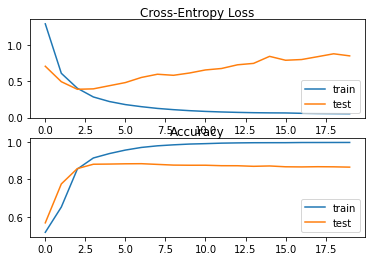

In [67]:
from matplotlib import pyplot

# evaluate the model
_, train_acc = model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Jika kita lihat sekilas, maka epochs yang harus digunakan adalah di kisaran 2 sampai 5(dilihat dari validation loss) dan 4 sampai 5(dilihat dari validation accuracy).

##Menggunakan Early Stopping

In [68]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Dibuat 2 fungsi early stopping, yang satu meninjau dari val loss yang satu val accuracy

from keras import callbacks
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)

In [70]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [71]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=1, callbacks=[es])

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 1.1315 - accuracy: 0.5353 - val_loss: 0.5768 - val_accuracy: 0.6955
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5008 - accuracy: 0.7872 - val_loss: 0.4191 - val_accuracy: 0.8423
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3501 - accuracy: 0.8908 - val_loss: 0.3348 - val_accuracy: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2471 - accuracy: 0.9273 - val_loss: 0.2944 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1828 - accuracy: 0.9464 - val_loss: 0.2810 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1397 - accuracy: 0.9616 - val_loss: 0.2825 - val_accuracy: 0.8871
Epoch 00006: early stopping


Train: 0.973, Test: 0.887


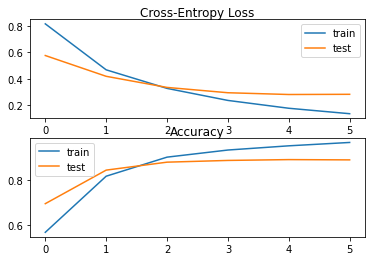

In [72]:
_, train_acc = model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Dengan hanya menggunakan early stop, maka epochs yang harus digunakan ada di 3 (dilihat dari validation loss) dan 5 (jika dilihat dari validation accuracy).

In [73]:
# Mencoba meningkatkan kualitas early stopping dengan menambahkan argumen patience

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
# Memberi tambah 12 epochs

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=12)
# es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=12)

In [75]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [76]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=1, callbacks=[es])

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 4.8422 - accuracy: 0.4987 - val_loss: 0.7989 - val_accuracy: 0.5012
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.7605 - accuracy: 0.5134 - val_loss: 0.7212 - val_accuracy: 0.5316
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6920 - accuracy: 0.5651 - val_loss: 0.6576 - val_accuracy: 0.5910
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6202 - accuracy: 0.6288 - val_loss: 0.5729 - val_accuracy: 0.6776
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5227 - accuracy: 0.7345 - val_loss: 0.4714 - val_accuracy: 0.7736
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3989 - accuracy: 0.8360 - val_loss: 0.4150 - val_accuracy: 0.8427
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2963 - accuracy: 0.9035 - val_loss: 0.4195 - val_accuracy: 0.8688
Epoch 8/20
30

Train: 0.996, Test: 0.869


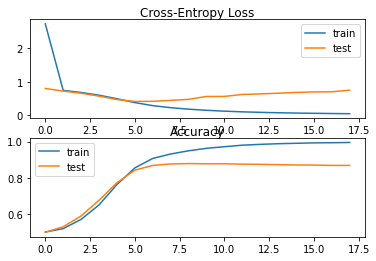

In [77]:
_, train_acc = model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [78]:
# Membuat Checkpoint

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [80]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, validation_data=(x_val, y_val), epochs=20, verbose=0, callbacks=[es, mc])


Epoch 00001: val_loss improved from inf to 0.68717, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.68717 to 0.52869, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.52869 to 0.37747, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.37747 to 0.36287, saving model to best_model.h5

Epoch 00005: val_loss did not improve from 0.36287

Epoch 00006: val_loss did not improve from 0.36287

Epoch 00007: val_loss did not improve from 0.36287

Epoch 00008: val_loss did not improve from 0.36287

Epoch 00009: val_loss did not improve from 0.36287

Epoch 00010: val_loss did not improve from 0.36287

Epoch 00011: val_loss did not improve from 0.36287

Epoch 00012: val_loss did not improve from 0.36287

Epoch 00013: val_loss did not improve from 0.36287

Epoch 00014: val_loss did not improve from 0.36287

Epoch 00015: val_loss did not improve from 0.36287

Epoch 00016: val_loss did not improve from 0.36287
Epoch 00016: early stopping


In [81]:
from keras import models

saved_model = models.load_model('best_model.h5')

_, train_acc = saved_model.evaluate(partial_x_train, partial_y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.940, Test: 0.885


Setelah menggunakan early stop dan check point, walaupun early stop val loss berhenti pada epoch ke 18 tapi best modelnya berada di epoch ke 5. Sedangkan untuk early stop val accuracy berhenti pada epoch ke 17 tapi best modelnya berada di epoch ke 5 juga.

* Setiap kali runtime mungkin hasilnya akan berbeda tapi epoch nya tidak akan berbeda jauh (tetap berada dikisaran tertentu).